<a href="https://colab.research.google.com/github/IrinaBoyarchukova/OsnovePython/blob/main/HW4_home_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к семинару 4
# Визуальный анализ данных


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### Задание 1.1 Считать данные с помощью pandas

In [5]:
df = pd.read_csv('kc_final.csv')
df.sample(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13012,13012,7215720410,2015-04-15,726888.0,5,3.00,2970,7261,2.0,0,...,9,2970,0,1999,0,98075,47.5994,-122.019,2970,8437
18208,18208,2579500110,2014-07-01,2367000.0,3,2.25,3530,17450,1.0,1,...,9,1840,1690,1930,1993,98040,47.5358,-122.213,3530,17310
6479,6479,9512500460,2014-07-11,525000.0,3,1.50,1560,9350,1.0,0,...,7,1220,340,1969,0,98052,47.6729,-122.148,1870,8671
1575,1575,1939110310,2015-03-10,722080.0,3,3.25,3680,7650,2.0,0,...,9,2340,1340,1988,0,98074,47.6272,-122.033,2280,8515
7722,7722,9274204230,2014-07-09,410000.0,3,1.75,1660,6250,1.0,0,...,7,830,830,1980,0,98116,47.5859,-122.385,1660,5750


In [ ]:
#df[df['price'] > 4000000]

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.2 Изучите стоимости недвижимости

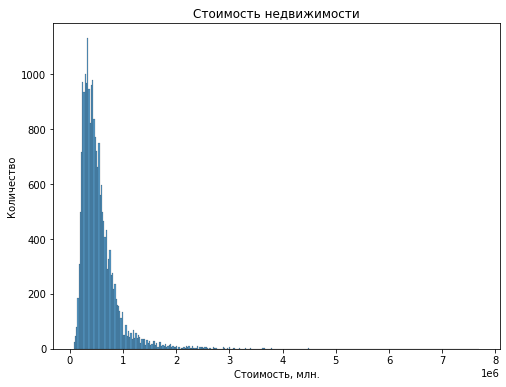

In [7]:
plt.figure(figsize=(8, 6))

sns.histplot(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость, млн.')
plt.ylabel('Количество');
#plt.xticks(rotation = 30);

Анализ стоимости недвижимости показывает, что стоимость наибольшего числа домов находится от 250 до 750 тысяч.    
Стоимость наибольшего числа домов около 500 тысяч.   
Также есть дома с очень высокой стоимостью (выше 1 млн.)   
Распределение стоимости похоже на нормальное. 

### 1.3 Изучите распределение квадратуры жилой площади

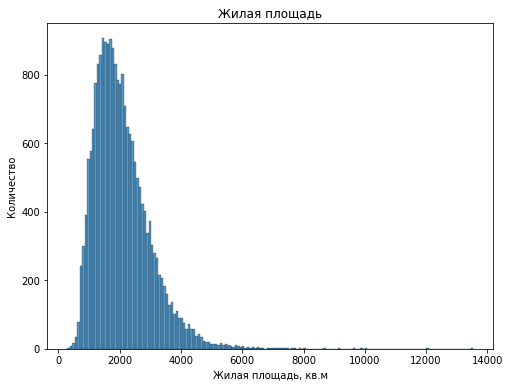

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sqft_living'])
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество');

Преобладают дома с жилой площадью от 1000 до 3000 квадратных метров.    
Наибольшее число домов с жилой площадью около 2000 кв. метров.    
Распределение метража похоже на норомальное.

### 1.4 Изучите распределение года постройки

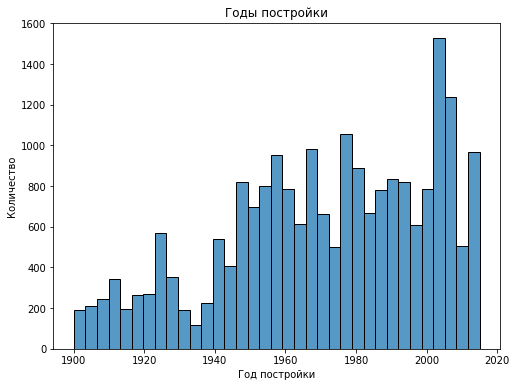

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yr_built'])
plt.title('Годы постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Саммое большое количество домов было построено начале 2000-х годов.  
Также можно наблюдать периодические всплески строительства с 1960 по 1980 годы.   
С начала 1900 по 1980 наблюдается рост количества домов, вероятно, связанный с развитием региона.   
Наименьшее количество домов было построено в середине 30-х годов 20 века.

## Задание 2. 
- Постройте график
- Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

In [10]:
# Готовим данные для графика
data = df['waterfront'].value_counts()
data.index = ['Без вида', 'С видом']
data.head()

Без вида    21450
С видом       163
Name: waterfront, dtype: int64

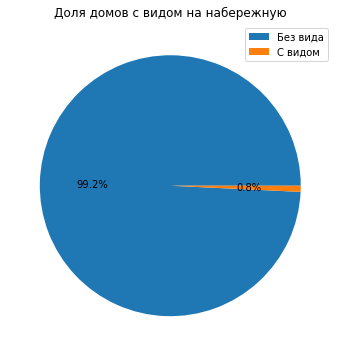

In [11]:
plt.figure(figsize=(8, 6))

plt.pie(data, autopct='%1.1f%%')   # добавляем процентовку

plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

Очень маленькое количество домов из всех имеет вид на набережную

### 2.2 Изучите распределение этажей домов

In [12]:
data = df['floors'].value_counts().reset_index()
data.head()

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


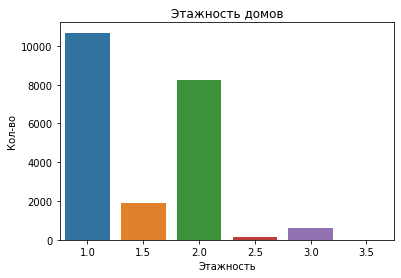

In [13]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['floors'])

plt.title('Этажность домов')
plt.xlabel('Этажность')
plt.ylabel('Кол-во');
#plt.xticks(rotation=30);

Наибольшее количество домов с одним и двумя этажами

### 2.3 Изучите распределение состояния домов

In [14]:
data = df['condition'].value_counts()
data.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

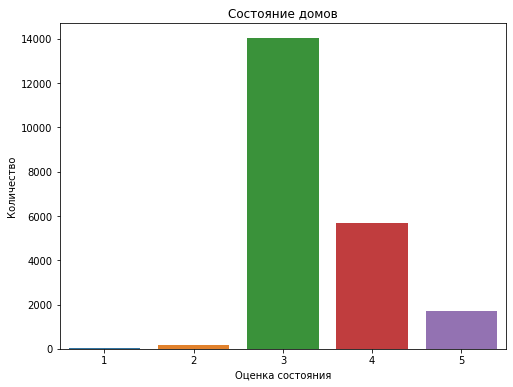

In [15]:
counts = df['condition'].value_counts()
plt.figure(figsize=(8, 6))
plt.title('Состояние домов')
plt.xlabel('Оценка состояния')
plt.ylabel('Количество')
sns.barplot(x=counts.index, y=counts.values);
#plt.grid()
#plt.xticks(rotation = 30);

Больше все домов в среднем состоянии.    
В состоянии ниже среднего и в плохом состоянии домов мало.

## Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.   
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.   

**Построим матрицу корреляций для визуализации линейных связей между переменными**

In [16]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
#corr_matrix

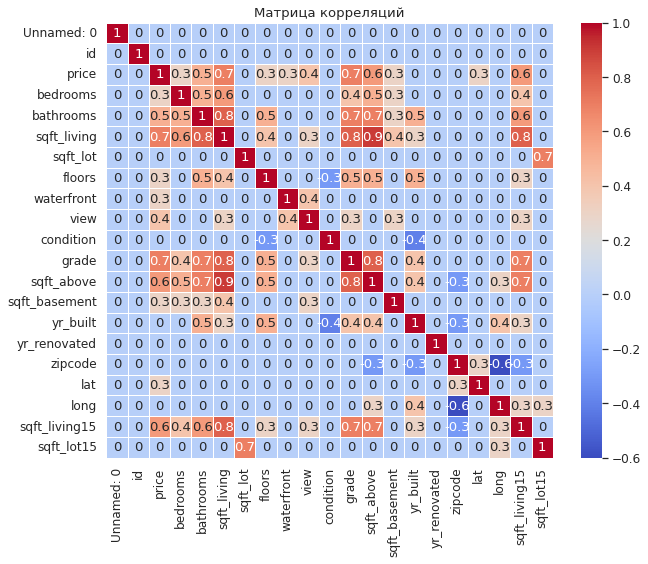

In [17]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.1)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций');

Судя по матрице корреляций стоимость дома имеет завсисмость от (в порядке убывания): 
- жилой площади 
- конструкции и дизайна 
- общей площади дома над землёй
- жилой площади у 15 соседей
- количества ванных комнат
- вида из окна
- вида на набережную

### 3.1 Медианная стоимость домов с видом на набережную

In [18]:
data_1 = df.pivot_table(index='waterfront',
                   values='price',
                   aggfunc='median').reset_index()
data_1.index = ['Без вида', 'С видом']
data_1

,waterfront,price
Без вида,0,450000.0
С видом,1,1400000.0


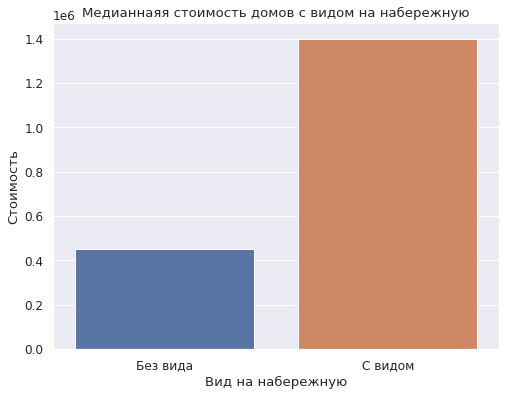

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data_1.index, y=data_1.price)
plt.title('Медианнаяя стоимость домов с видом на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость');

Медианная стоимость домов с видом на набережную значительно выше медианной стоимости остальных домов

### 3.2 Медианная стоимость домов в зависимости от вида

In [20]:
data_2 = df.pivot_table(index='view',
                   values='price',
                   aggfunc='median').reset_index()
#data_2

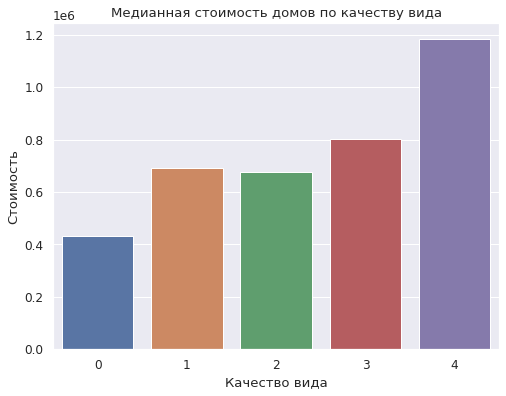

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data_2.view, y=data_2.price)
plt.title('Медианная стоимость домов по качеству вида')
plt.xlabel('Качество вида')
plt.ylabel('Стоимость');

Стоимость дома зависит от вида вокруг дома.    
Чем лучше вид, тем дороже дом.   
Однако стоимость домов с качеством вида "1" чуть выше стоимости домов с качетсвом вида "2". Возможно, дома с качеством вида "1" расположены ближе к ценру населенного пункта или в близм каких-то важных объектов инфраструктуры.

### 3.3 Медианная стоимость домов в зависимости от количества ванных комнат

In [22]:
data_3 = df.pivot_table(index='bathrooms',
                   values='price',
                   aggfunc='median').reset_index()
#data_3

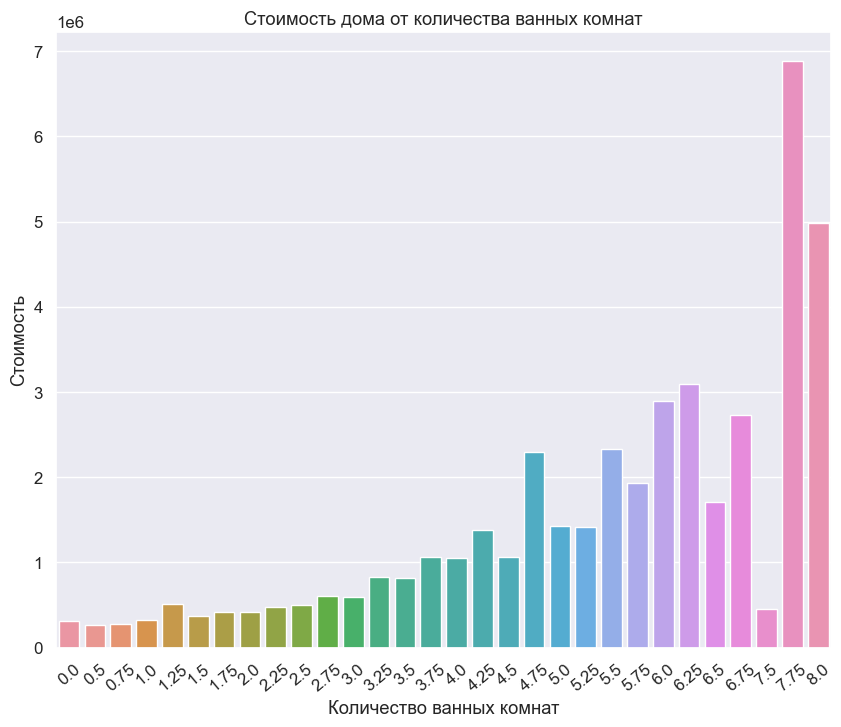

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=data_3.bathrooms, y=data_3.price)
plt.title('Стоимость дома от количества ванных комнат')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Стоимость')
plt.xticks(rotation = 40);

Стоимость домов увеличивается с увеличением количества ванных комнат.   
Стоимость домов начинает кручее расти, когда ванных комнат становится больше 3. Вероятно, больше увеличивается жилая площадь дома.

### 3.4 Стоимость домов в зависимости от жилой площади у 15 соседей

In [23]:
data_4 = df.pivot_table(index='sqft_lot15',
                   values='price',
                   aggfunc='median').reset_index()
#data_4

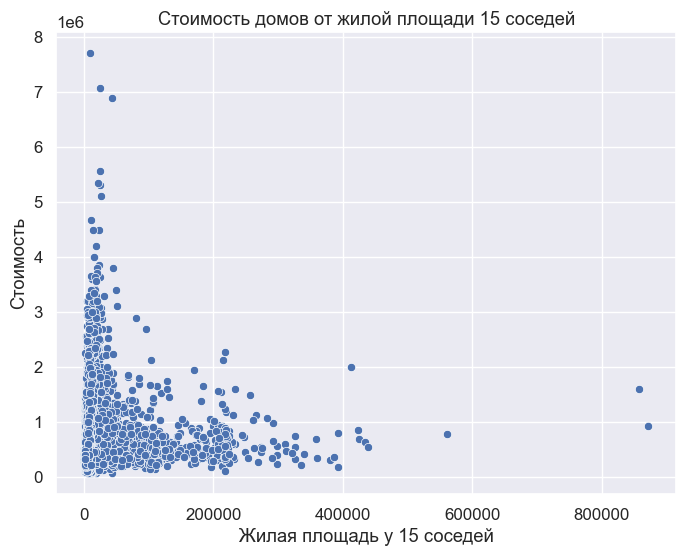

In [ ]:
plt.figure(figsize=(8, 6))

#sns.scatterplot(x=data_4['sqft_lot15'], y=data_4['price'])

sns.scatterplot(x=df['sqft_lot15'], y=df['price'])
plt.title('Стоимость домов от жилой площади 15 соседей')
plt.xlabel('Жилая площадь у 15 соседей')
plt.ylabel('Стоимость');

Можно сказать, что чем меньше жилая площадь у 15 соседей, тем выше стоимость дома.   
Возможно, меньшее количество жилой площади у соседей обусловлено меньшим количеством самих соседей. 

### 3.5 Стоимость домов в зависимости от площади дома над землёй

In [24]:
data_5 = df.pivot_table(index='sqft_above',
                   values='price',
                   aggfunc='median').reset_index()
#data_5

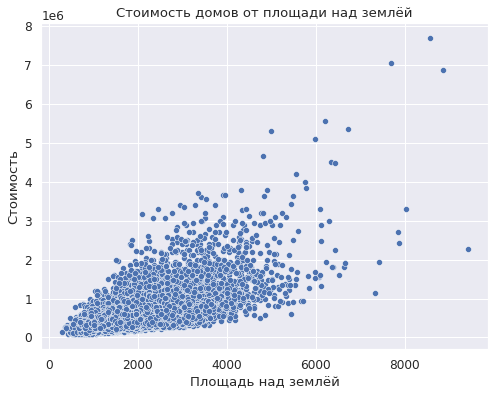

In [25]:
plt.figure(figsize=(8, 6))

#sns.scatterplot(x=data_5['sqft_above'], y=data_5['price'])

sns.scatterplot(x=df['sqft_above'], y=df['price'])
plt.title('Стоимость домов от площади над землёй')
plt.xlabel('Площадь над землёй')
plt.ylabel('Стоимость');

С увеличением площади стоимость домов растёт.  
При этом стоимость растёт не равномерно, для каких-то домов при одинаковой площади стоимость выше, для каких-то ниже. Вероятно оказывают влияние другие факторы.

### 3.6 Медианная стоимость домов в зависимости от конструкции и дизайна

In [26]:
data_6 = df.pivot_table(index='grade',
                   values='price',
                   aggfunc='median').reset_index()
#data_6

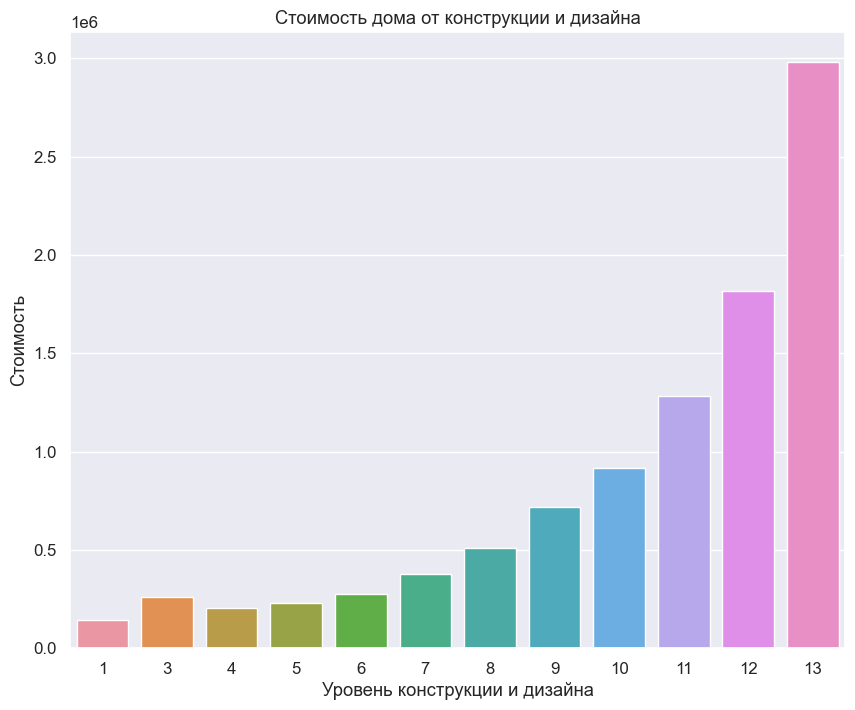

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=data_6.grade, y=data_6.price)
plt.title('Стоимость дома от конструкции и дизайна')
plt.xlabel('Уровень конструкции и дизайна')
plt.ylabel('Стоимость');
#plt.xticks(rotation = 40);

Стоимость дома зависит от качества конструкции и дизайна.   
Чем выше уровень, тем выше стоимость дома.   
Для уровня "3" стоимость домов выше, чем для уровня "4" и "5", что может говорить о других факторах, оказывающих влияние на стоимость этих домов. 

### 3.7 Стоимость домов в зависимости от жилой площади

In [27]:
data_7 = df.pivot_table(index='sqft_living',
                   values='price',
                   aggfunc='median').reset_index()
#data_7

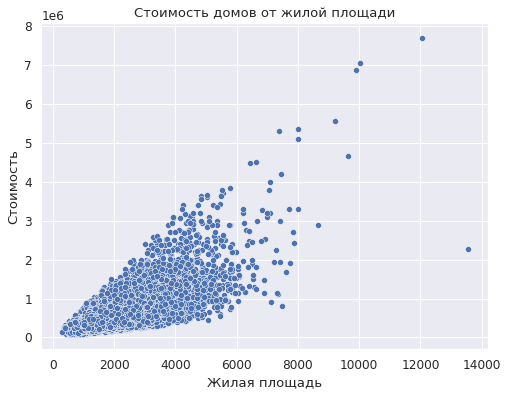

In [28]:
plt.figure(figsize=(8, 6))

#sns.scatterplot(x=data_7['sqft_living'], y=data_7['price'])

sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Стоимость домов от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость');

Стоимость дома зависит от жилой площади.    
С величением жилой площади увеличивается стоимость домов.    
При этом стоимость растёт не равномерно, для каких-то домов при одинаковой площади стоимость выше, для каких-то ниже. Вероятно оказывают влияние другие факторы.